In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [3]:
le = LabelEncoder()
rf = RandomForestClassifier()
sc = StandardScaler()

In [89]:
df = pd.read_csv("adult.csv")

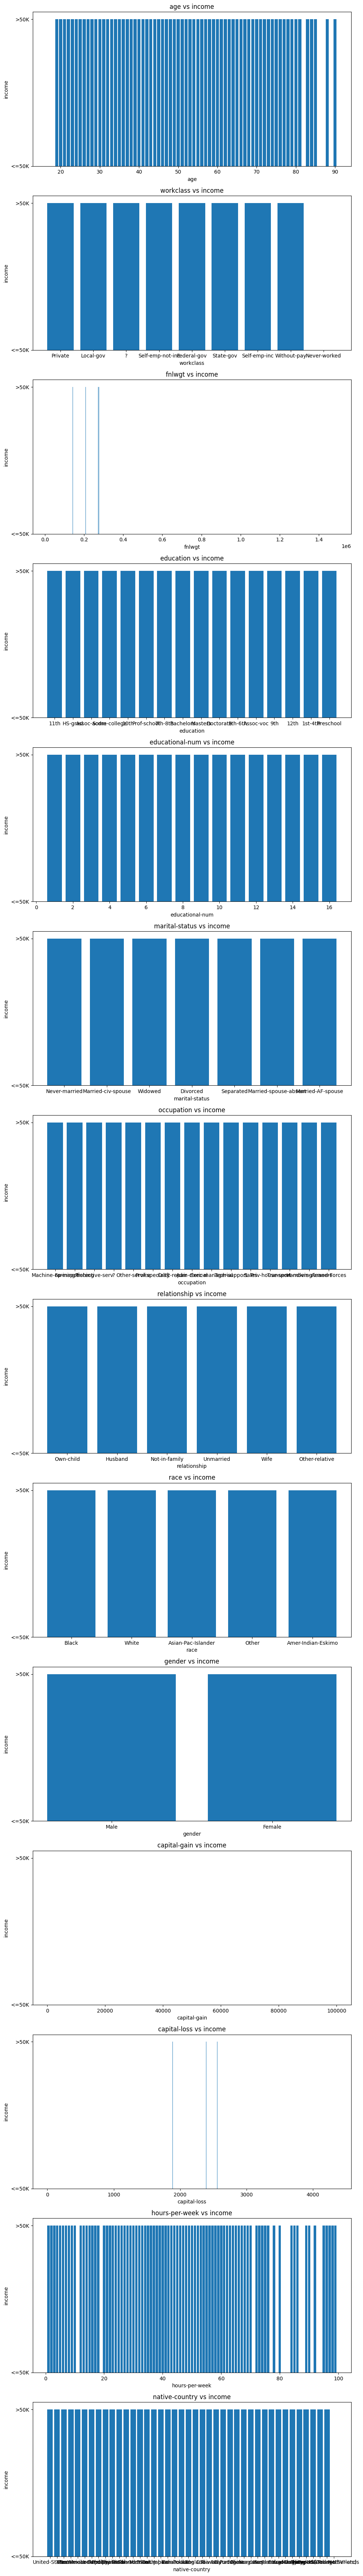

In [91]:
feature_columns = df.columns[:-1]  # Exclude the target column

# Set the figure size and layout
fig, axs = plt.subplots(len(feature_columns), 1, figsize=(10, 5 * len(feature_columns)))

# Iterate over each feature column and create a bar chart
for i, col in enumerate(feature_columns):
    ax = axs[i] if len(feature_columns) > 1 else axs
    ax.bar(df[col], df[df.columns[-1]])
    ax.set_xlabel(col)
    ax.set_ylabel(df.columns[-1])
    ax.set_title(f'{col} vs {df.columns[-1]}')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [81]:
# Replace "?" with NaN
df.replace('?', pd.NA, inplace=True)

In [82]:
# Drop rows containing NaN values
df.dropna(inplace=True)

In [83]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [84]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [86]:
df['income'] = le.fit_transform(df['income'])
df.gender = le.fit_transform(df.gender)
df.workclass = le.fit_transform(df.workclass)
df.education = le.fit_transform(df.education)
df['marital-status'] = le.fit_transform(df['marital-status'])
df.occupation = le.fit_transform(df.occupation)
df.relationship = le.fit_transform(df.relationship)
df.race = le.fit_transform(df.race)
df['native-country'] = le.fit_transform(df['native-country'])

In [87]:
df.dropna(inplace = True, axis = 'rows')

In [74]:
X = df.drop('income', axis = 'columns')
y = df.income

In [ ]:
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
# Create a new balanced DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Display the updated DataFrame
balanced_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [ ]:
A = balanced_data.drop('income', axis = 'columns')
B = balanced_data.income

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(A,B, test_size = 0.2, random_state = 42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test, y_test)

0.8926036608143444

In [ ]:
y_preds = rf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm

array([[2413,  281],
       [ 294, 2366]])

In [ ]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2694
           1       0.89      0.89      0.89      2660

    accuracy                           0.89      5354
   macro avg       0.89      0.89      0.89      5354
weighted avg       0.89      0.89      0.89      5354



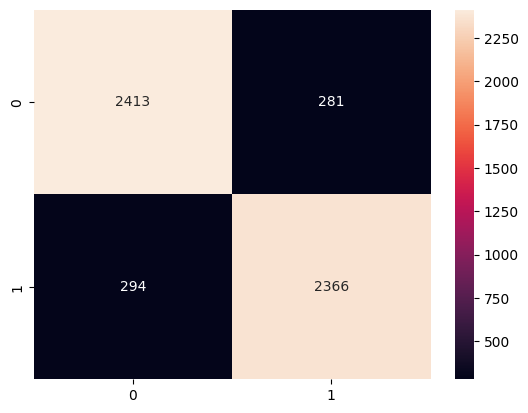

In [ ]:
sns.heatmap(cm, annot = True, fmt = 'g');

In [ ]:
pickle.dump(rf, open('adult_model.pkl', 'wb'))